**Importing the libraries**

In [5]:
import pandas as pd
import numpy as np
import json
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

**Mounting the google drive in colab**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the dataset and data preparation**

In [7]:
data = pd.read_csv("/content/drive/MyDrive/Use_Case/movie.metadata.tsv", sep = "\t", header = None)
data.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [8]:
# renaming the columns

data.rename(columns = {0:"Movie_ID", 2:"Movie_name", 8:"Movie_genre"}, inplace = True)
data.head()

,Movie_ID,1,Movie_name,3,4,5,6,7,Movie_genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [9]:
# extracting movie_id and plot from "plot_summaries.txt" file

movie_id = []
plot = []
f = open("/content/drive/MyDrive/Use_Case/plot_summaries.txt", "r", encoding="utf-8")
summary_list = f.readlines()
for i in summary_list:
    summary = i.split("\t")
    movie_id.append(summary[0])
    plot.append(summary[1].strip("\n"))

In [10]:
# creating dataframe for Movie_ID and Plot

movie = pd.DataFrame({"Movie_ID":movie_id, "Plot":plot})
movie.head()

,Movie_ID,Plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [11]:
# converting Movie_ID to string

data["Movie_ID"] = data["Movie_ID"].astype(str)

In [12]:
# merging the dataset to get master dataset

Movies = pd.merge(movie, data[["Movie_ID", "Movie_name", "Movie_genre"]], on = "Movie_ID")
Movies.head()

,Movie_ID,Plot,Movie_name,Movie_genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."


In [13]:
# converting json dictionary to list of genres

genre = []
for i in Movies["Movie_genre"]:
    genre.append(list(json.loads(i).values()))
Movies["genre_list"] = genre

In [14]:
Movies.head()

,Movie_ID,Plot,Movie_name,Movie_genre,genre_list
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]"
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...","[Screwball comedy, Comedy]"
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, Docudrama, World cinema..."


In [15]:
# getting number of movies that have no genres

movies_with_no_genre = 0
for i in Movies["genre_list"]:
    if len(i) == 0:
        movies_with_no_genre += 1
print("Number of movies with no genres : ", movies_with_no_genre)

Number of movies with no genres :  411


In [16]:
# filtering out data that have no genres

data_new = Movies[~(Movies['genre_list'].str.len() == 0)]
print("New shape of dataset : ", data_new.shape)
print("previous shape of dataset : ", Movies.shape)

New shape of dataset :  (41796, 5)
previous shape of dataset :  (42207, 5)


In [17]:
# getting unique genres present in the dataset

all_genres = []
for i in data_new["genre_list"]:
    for j in i:
        all_genres.append(j)

print("Number of unique genres in the data are : ",len(list(set(all_genres))))
genre_dict = nltk.FreqDist(all_genres)
genre_df = pd.DataFrame({'Genre': list(genre_dict.keys()), 'Count': list(genre_dict.values())})
print("\n")
print("Genre data count : ")
genre_df.head()

Number of unique genres in the data are :  363


Genre data count : 


,Genre,Count
0,Drama,19135
1,World cinema,5153
2,Action/Adventure,3553
3,Science Fiction,2339
4,Action,5869


**EDA**

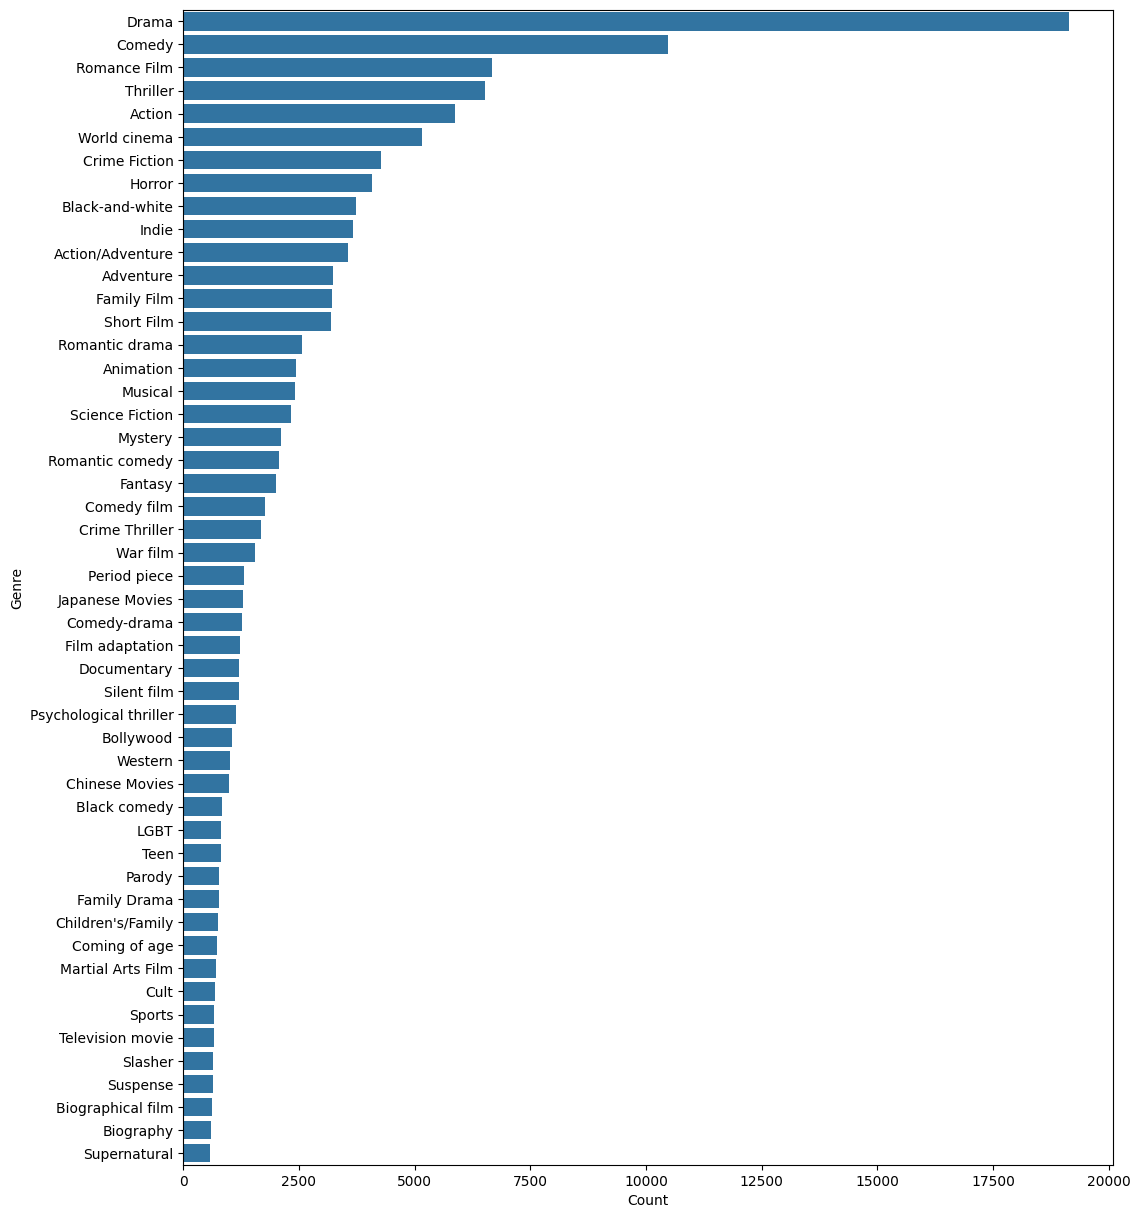

In [18]:
# plotting frequency of genres in data

g = genre_df.nlargest(columns="Count", n = 50)
plt.figure(figsize=(12,15))
sns.barplot(data=g, x= "Count", y = "Genre")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

**Feature Cleaning**

In [19]:
# function  to clean the movie plot

def clean(text):
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [20]:
# applying the function on data

data_new.loc[:, "cleaned_plot"] = data_new["Plot"].apply(lambda x: clean(x))

<ipython-input-20-62bded0e0187>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.loc[:, "cleaned_plot"] = data_new["Plot"].apply(lambda x: clean(x))


In [21]:
# function to remove the stopwords from movies plot

nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    text1 = []
    for i in text.split():
        if i not in stop_words:
            text1.append(i)
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
# applying the function on dataset

data_new.loc[:, "cleaned_plot"] = data_new["cleaned_plot"].apply(lambda x: remove_stopwords(x))
data_new.head()

,Movie_ID,Plot,Movie_name,Movie_genre,genre_list,cleaned_plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]",shlykov hard working taxi driver lyosha saxoph...
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr...",nation panem consists wealthy capitol twelve p...
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]",poovalli induchoodan sentenced six years priso...
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...","[Screwball comedy, Comedy]",lemon drop kid new york city swindler illegall...
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, Docudrama, World cinema...",seventh day adventist church pastor michael ch...


**Label Cleaning**

In [23]:
# set of functions for label cleaning

integrated_genres = ['Action Comedy','Action Thrillers','Adventure Comedy','Comedy Thriller',
'Comedy Western','Comedy film','Comedy horror','Crime Comedy',
'Crime Drama','Crime Thriller','Gay pornography', 'Musical Drama',
'Musical comedy','Fantasy adventure', 'Fantasy Comedy', 'Fantasy Drama','Horror Comedy',
'Epic Western', 'Anti-war Film']

k = [i.lower() for i in integrated_genres]

def replace_action_adventure(genre_list):
  if 'Action/Adventure' in genre_list:
    genre_list.remove('Action/Adventure')
    genre_list.extend(['Action', 'Adventure'])
  return list(set(genre_list))

def lower_genre(x):
  return [i.lower() for i in x]

def replace(genre_list):
  for i in genre_list:
    if i in k:
      genre_list.remove(i)
      genre_list.extend(i.split(" "))
  return list(set(genre_list))

def similarity_replace(genre_list):
  replacements = {'music': 'musical', 'thrillers': 'thriller', "comdedy": "comedy"}
  updated_genres = [replacements[genre] if genre in replacements else genre for genre in genre_list]
  return list(set(updated_genres))

def normalize_genres(l1):
  for i in l1:
    if "comedy" in i:
      ind = l1.index(i)
      l1[ind] = "comedy"
    elif "drama" in i:
      ind = l1.index(i)
      l1[ind] = "drama"
    elif "adventure" in i:
      ind = l1.index(i)
      l1[ind] = "adventure"
    elif "crime" in i:
      ind = l1.index(i)
      l1[ind] = "crime"
    elif "horror" in i:
      ind = l1.index(i)
      l1[ind] = "horror"
    elif "thriller" in i:
      ind = l1.index(i)
      l1[ind] = "thriller"
    elif "fantasy" in i:
      ind = l1.index(i)
      l1[ind] = "fantasy"
    elif "satire" in i:
      ind = l1.index(i)
      l1[ind] = "satire"
    elif "gay" in i:
      ind = l1.index(i)
      l1[ind] = "gay"
    elif "porn" in i:
      ind = l1.index(i)
      l1[ind] = "pornography"
    elif "monster" in i:
      ind = l1.index(i)
      l1[ind] = "monster"
    elif "war" in i:
      ind = l1.index(i)
      l1[ind] = "war"
  return list(set(l1))

# applying all label cleaning functions to dataframe

data_new.loc[:, "genre_list"] = data_new["genre_list"].apply(replace_action_adventure)
data_new.loc[:, "genre_list"] = data_new["genre_list"].apply(lower_genre)
data_new.loc[:, "genre_list"] = data_new["genre_list"].apply(replace)
data_new.loc[:, "genre_list"] = data_new["genre_list"].apply(similarity_replace)
data_new.loc[:, "genre_list"] = data_new["genre_list"].apply(normalize_genres)

In [24]:
# checking unique genres after label cleaning

all_genres = []
for i in data_new["genre_list"]:
    for j in i:
        all_genres.append(j)

print("Number of unique genres in the data before label cleaning : ",363)
print("Number of unique genres in the data after label cleaning : ",len(list(set(all_genres))))

Number of unique genres in the data before label cleaning :  363
Number of unique genres in the data after label cleaning :  281


**Model Creation**

In [27]:
# Importing libraries

from transformers import BertTokenizer, TFBertModel
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
import tensorflow as tf

In [26]:
# Features and Labels

summaries = data_new["cleaned_plot"].to_list()
genres = data_new["genre_list"].to_list()

**Initializing Bert tokenizer**

In [28]:
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

**Multi Label hot-encoding**

In [29]:
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(genres)

**Tokenization of summaries**

In [33]:
tokenized_summary = tokenizer(summaries,
                              max_length=128,
                              truncation=True,
                              padding="max_length",
                              add_special_tokens=True,
                              return_tensors="np")

labels_array = np.array(labels)

**Function for attention mask**

In [34]:
def get_attention_mask(input_id):
  attention_mask = []
  for i in range(128):
    if input_id[i] != 0:
      attention_mask.append(1)
    else:
      attention_mask.append(0)
  return np.array(attention_mask)

**Splitting the data**

In [35]:
train_text, test_text, train_labels, test_labels = train_test_split(tokenized_summary["input_ids"], labels_array, test_size=0.2)
train_plot, val_plot, train_genres, val_genres = train_test_split(train_text, train_labels, test_size=0.2)

train_attn_mask = np.array([get_attention_mask(i) for i in train_plot])
val_attn_mask = np.array([get_attention_mask(i) for i in val_plot])
test_attn_mask = np.array([get_attention_mask(i) for i in test_text])

**tf.data input pipeline**

In [36]:
train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': train_plot,'attention_mask': train_attn_mask}, train_genres)).batch(4)
val_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': val_plot,'attention_mask': val_attn_mask}, val_genres)).batch(4)
test_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': test_text,'attention_mask': test_attn_mask}, test_labels)).batch(4)
print(test_dataset.take(1))

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(None, 128), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 128), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 281), dtype=tf.int64, name=None))>


**Initializing Bert Model**

In [ ]:
bert_model = TFBertModel.from_pretrained("bert-base-cased")

# freezing first 90% layers
num_total_layers = len(bert_model.layers)
num_layers_to_freeze = int(0.9 * num_total_layers)

for layer in bert_model.layers[:num_layers_to_freeze]:
    layer.trainable = False

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

**Compatible version for Bert**

In [ ]:
# !pip show transformers
!pip install transformers==4.31.0

**Neural Network Defination**

In [ ]:
input_ids = tf.keras.layers.Input(shape=(128,), name = "input_ids", dtype = "int32")
attention_masks = tf.keras.layers.Input(shape=(128,), name = "attention_mask", dtype = "int32")
bert_embds = bert_model.bert(input_ids, attention_mask = attention_masks)[1]
hidden_layer = tf.keras.layers.Dense(512, activation="relu", name="hidden_layer")(bert_embds)
output_layer = tf.keras.layers.Dense(281, activation="sigmoid")(hidden_layer)
model = tf.keras.Model(inputs = [input_ids, attention_masks], outputs = output_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1083102   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   72         'attention_mask[0][0]']      
                             hidden_state=(None, 128, 7                                       

**Model Training**

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5)
loss = tf.keras.losses.BinaryCrossentropy()
accuracy = tf.keras.metrics.BinaryAccuracy()
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

model.compile(optimizer = optimizer, loss = loss, metrics = [accuracy, precision, recall])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/saved_models/best_bert',
                                                         monitor='val_precision', mode='max', save_best_only= True, verbose=1)

history = model.fit(train_dataset, validation_data = val_dataset, epochs = 5, callbacks = [checkpoint_callback])

Epoch 1/5
6687/6687 [==============================] - ETA: 0s - loss: 0.0519 - binary_accuracy: 0.9845 - precision: 0.2163 - recall: 0.1269
Epoch 1: val_precision improved from -inf to 0.65932, saving model to /content/drive/MyDrive/saved_models/best_bert
6687/6687 [==============================] - 1158s 163ms/step - loss: 0.0519 - binary_accuracy: 0.9845 - precision: 0.2163 - recall: 0.1269 - val_loss: 0.0336 - val_binary_accuracy: 0.9896 - val_precision: 0.6593 - val_recall: 0.2532
Epoch 2/5
6687/6687 [==============================] - ETA: 0s - loss: 0.0308 - binary_accuracy: 0.9902 - precision: 0.6816 - recall: 0.2947
Epoch 2: val_precision improved from 0.65932 to 0.66370, saving model to /content/drive/MyDrive/saved_models/best_bert
6687/6687 [==============================] - 1081s 162ms/step - loss: 0.0308 - binary_accuracy: 0.9902 - precision: 0.6816 - recall: 0.2947 - val_loss: 0.0309 - val_binary_accuracy: 0.9901 - val_precision: 0.6637 - val_recall: 0.3303
Epoch 3/5
6687/

**Saving the Best Model**

In [ ]:
model.save('/content/drive/MyDrive/saved_models/best_bert', save_format='tf')

**loading the model and testing it on test dataset**

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/saved_models/best_bert")
evaluation = model.evaluate(test_dataset)
print("Test loss : ", evaluation[0])
print("Test Accuracy : ", evaluation[1])
print("Test Precision : ", evaluation[2])
print("Test Recall : ", evaluation[3])

2090/2090 [==============================] - 3632s 2s/step - loss: 0.0235 - binary_accuracy: 0.9923 - precision: 0.7524 - recall: 0.5156
Test loss :  0.023482760414481163
Test Accuracy :  0.9922814965248108
Test Precision :  0.7523689270019531
Test Recall :  0.515584409236908


**Testing Model on different thresholds**

In [32]:
# loading saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/saved_models/best_bert")

In [41]:
# predictions from model
predictions = model.predict(test_dataset)

2090/2090 [==============================] - 3565s 2s/step
[[1.05930914e-04 3.24075245e-06 1.62246276e-03 ... 9.88118991e-05
  1.90887292e-07 1.19951161e-04]
 [7.34879577e-04 2.36713709e-06 2.00231653e-02 ... 1.76151862e-05
  1.16728304e-04 6.05891831e-02]
 [1.20047317e-03 1.23262380e-05 4.33416385e-03 ... 3.13790835e-04
  1.02483818e-05 6.86287181e-04]
 ...
 [2.18438581e-04 1.37314455e-05 2.96570105e-03 ... 3.48308386e-05
  1.76271740e-07 1.76629401e-04]
 [1.44988153e-04 4.12431973e-06 9.07978535e-01 ... 3.45203048e-03
  3.26426530e-08 1.50805790e-04]
 [4.43936558e-03 5.21629117e-04 8.94290768e-03 ... 2.16679327e-04
  1.83754077e-04 2.52109789e-03]]


In [70]:
# fucntion to calculate precision
def precision(actual_labels, predicted_scores, threshold):
    predicted_labels = (predicted_scores >= threshold).astype(int)

    true_positives = np.sum((predicted_labels == 1) & (actual_labels == 1))
    false_positives = np.sum((predicted_labels == 1) & (actual_labels == 0))

    if true_positives + false_positives > 0:
        precision = true_positives / (true_positives + false_positives)
    else:
        precision = 0.0

    return precision

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
precisions = []
for t in thresholds:
  k = precision(test_labels, predictions, t)
  precisions.append(k)

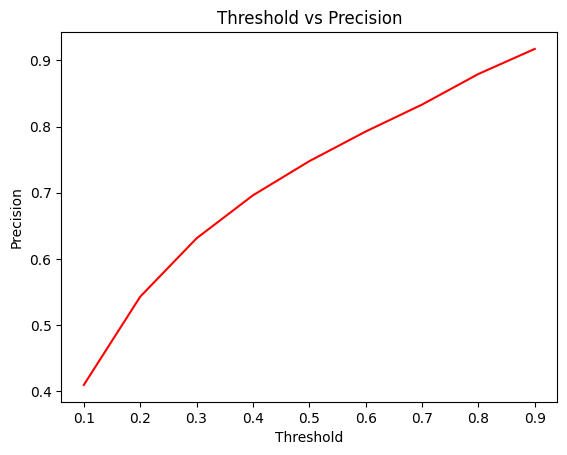

In [71]:
# plotting precision and threshold
plt.plot(thresholds, precisions, color = "red")
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.title("Threshold vs Precision")
plt.show()

**Tf serving**

In [1]:
# importing necessary libraries
import requests
import json
import os
import tempfile

In [2]:
# creating temprory directory
MODEL_DIR = tempfile.gettempdir()
version = 1

In [3]:
# expoerting to the path
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

export_path = /tmp/1



In [30]:
# loading saved model
model = tf.saved_model.load("/content/drive/MyDrive/saved_models/best_bert")

In [31]:
# saving loaded model to export path
tf.saved_model.save(model, export_path)

In [ ]:
!saved_model_cli show --dir {export_path} --all

2024-04-15 11:53:51.259693: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 11:53:51.259784: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 11:53:51.263813: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 11:53:52.713840: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the followin

In [ ]:
# adding tensorflow server to existing libraries
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   8784      0 --:--:-- --:--:-- --:--:--  8811
OK
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,026 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://sto

In [ ]:
# installing tensorflow server
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 46 not upgraded.
Need to get 650 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.16.1 [650 MB]
Fetched 650 MB in 10s (65.3 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.16.1_all.deb ...
Unpacking tensorflow-model-server (2.16.1) ...
Setting up tensorflow-model-server (2.16.1) ...


In [ ]:
# setting environment
os.environ["MODEL_DIR"] = MODEL_DIR

In [ ]:
# starting tensorflow server
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [ ]:
# server log
!tail server.log

2024-04-15 11:56:30.125880: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89075712 exceeds 10% of free system memory.
2024-04-15 11:56:30.128242: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89075712 exceeds 10% of free system memory.
2024-04-15 11:56:30.128911: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89075712 exceeds 10% of free system memory.


In [ ]:
# installing requests
!pip install -q requests

**Function to get input ids and attention mask of inputted Summary**

In [ ]:
def get_id_mask(summary):
  token = tokenizer(summary, max_length=128,
                    truncation=True, padding="max_length",
                    add_special_tokens=True, return_tensors="np")
  id = token["input_ids"].reshape(128).tolist()
  mask = token["attention_mask"].reshape(128).tolist()
  id_mask = [id, mask]
  return id_mask

**Function to predict from deployed model**

In [ ]:
def predict(input_ids, attention_mask):
  headers = {'Content-Type': 'application/json'}

  url = 'http://localhost:8501/v1/models/model:predict'

  input_data = [{'input_ids': input_ids, 'attention_mask': attention_mask}]

  json_data = json.dumps({"signature_name": "serving_default", "instances": input_data})

  response = requests.post(url, data = json_data, headers = headers)

  predictions = json.loads(response.text)['predictions']

  return predictions[0]

**Function to convert model prediction to movie genres**

In [ ]:
def predict_labels(predictions, threshold = 0.5):
  indices = [i for i, value in enumerate(predictions) if value > threshold]
  predicted_genres = mlb.classes_[indices]
  return predicted_genres


**Serving Client**

In [ ]:
samples = int(input("Number of movies to test : "))
for i in range(samples):
  movie_name = input("Enter Name of Movie : ")
  summary = input("Enter Summary of Movie : ")
  id_mask = get_id_mask(summary)
  predictions = predict(id_mask[0], id_mask[1])
  genres = predict_labels(predictions, 0.2)
  print("\n")
  print("Movie : ", movie_name)
  print("Genres : ", genres)
  print("\n")

Number of movies to test : 3
Enter Name of Movie : Intersteller
Enter Summary of Movie : In Earth's future, a global crop blight and second Dust Bowl are slowly rendering the planet uninhabitable. Professor Brand (Michael Caine), a brilliant NASA physicist, is working on plans to save mankind by transporting Earth's population to a new home via a wormhole. But first, Brand must send former NASA pilot Cooper (Matthew McConaughey) and a team of researchers through the wormhole and across the galaxy to find out which of three planets could be mankind's new home.


Movie :  Intersteller
Genres :  ['action' 'adventure' 'drama' 'science fiction' 'thriller']


Enter Name of Movie : 12 Strong
Enter Summary of Movie : In the wake of the September 11 attacks, Captain Mitch Nelson leads a US Special Forces team into Afghanistan for an extremely dangerous mission. Once there, the soldiers develop an uneasy partnership with the Northern Alliance to take down the Taliban and its al-Qaida allies. Out